<a href="https://colab.research.google.com/github/hal-yu/datasci_3_eda/blob/main/HHA507_W3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 Exploratory Data Analysis

Engage in the critical phase of Exploratory Data Analysis (EDA) using the tools and techniques from Python to uncover patterns, spot anomalies, test hypotheses, and identify the main structures of your dataset.

## Univariate Analysis
1. Load a dataset of your choice in your Colab notebook .ipynb or in a python script .py (you can use one from previous assignments or find a new one).
2. Manually perform a univariate analysis to understand the distribution of each variable. This includes calculating measures of central tendency (mean, median, mode) and measures of spread (range, variance, standard deviation, IQR).
3. Visualize the distribution of select numerical variables using histograms.

### Cleaning Data

In [8]:
### Loading in packages
import pandas as pd

In [19]:
### Load in data
df = pd.read_csv('sleep_lifestyle_dataset.csv')

In [20]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
### Check for Missing Values
missing_values = df.isnull().sum()
print(missing_values)

In [24]:
### Column names
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [26]:
import re
import numpy

In [27]:
# Function to remove white space and special characters from a value
def clean_column_names(data):
  def clean_name(value):
    cleaned_name = re.sub(r'[^a-zA-Z0-9$()]', '_', value)
    return cleaned_name.lower()

# Applying function for all columns
  data.columns = [clean_name(col) for col in data.columns]
  return data

df = clean_column_names(df)

In [28]:
df

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## Multiple Imputation

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [39]:
### Perform multiple imputation
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(df[["age", "sleep_duration", "quality_of_sleep", "physical_activity_level"]])
### Create a Dataframe with imputed values
imputed_df = pd.DataFrame(imputed_data, columns=["age", "sleep_duration", "quality_of_sleep", "physical_activity_level"])
### Combine imputed values with original dataset
sleep_and_physical_activity_df = pd.concat([df["gender"], imputed_df], axis =1)

In [40]:
print("\nDataFrame with Imputed Values:")
print(sleep_and_physical_activity_df)


DataFrame with Imputed Values:
     gender   age  sleep_duration  quality_of_sleep  physical_activity_level
0      Male  27.0             6.1               6.0                     42.0
1      Male  28.0             6.2               6.0                     60.0
2      Male  28.0             6.2               6.0                     60.0
3      Male  28.0             5.9               4.0                     30.0
4      Male  28.0             5.9               4.0                     30.0
..      ...   ...             ...               ...                      ...
369  Female  59.0             8.1               9.0                     75.0
370  Female  59.0             8.0               9.0                     75.0
371  Female  59.0             8.1               9.0                     75.0
372  Female  59.0             8.1               9.0                     75.0
373  Female  59.0             8.1               9.0                     75.0

[374 rows x 5 columns]


In [41]:
sleep_and_physical_activity_df.describe()

,age,sleep_duration,quality_of_sleep,physical_activity_level
count,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123
std,8.673133,0.795657,1.196956,20.830804
min,27.000000,5.800000,4.000000,30.000000
25%,35.250000,6.400000,6.000000,45.000000
50%,43.000000,7.200000,7.000000,60.000000
75%,50.000000,7.800000,8.000000,75.000000
max,59.000000,8.500000,9.000000,90.000000


## Bivariate Analysis:
1. Analyze the relationship between pairs of variables.
2. Use scatter plots to explore potential relationships between two numerical variables.
3. For categorical and numerical variable pairs, use boxplots.
4. Compute correlation coefficients for numerical variables and document any strong correlations observed.

### Scatter Plots

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

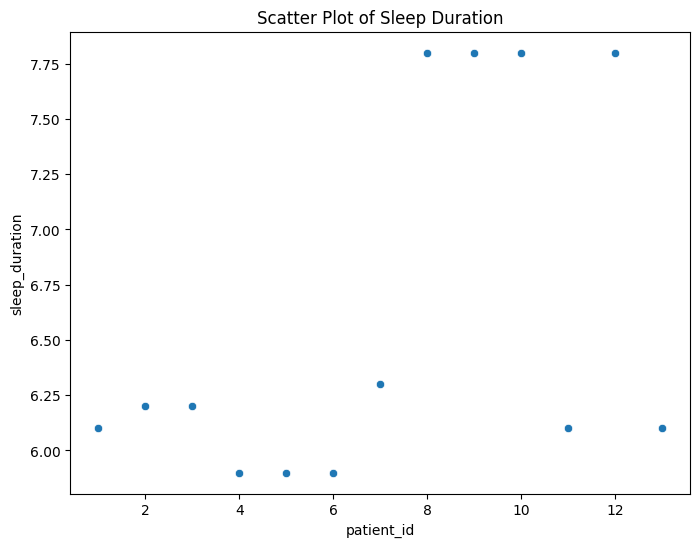

In [58]:
### Create Scatterplot for Sleep Duration
selected_patient_ids = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
sleep_duration = df['sleep_duration']
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['person_id'].iloc[selected_patient_ids], y=sleep_duration.iloc[selected_patient_ids])
plt.xlabel("patient_id")
plt.ylabel("sleep_duration")
plt.title("Scatter Plot of Sleep Duration")
plt.show()

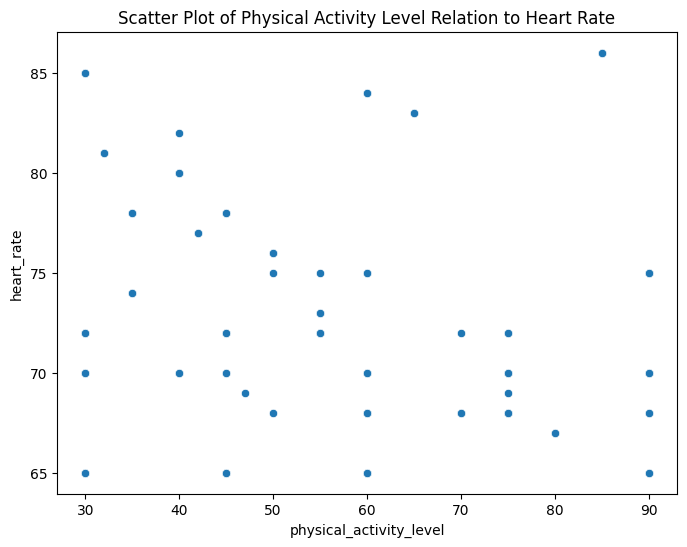

In [61]:
### Create Scatterplot for Physical Activity and Heart Rate
physical_activity_level = df['physical_activity_level']
heart_rate = df['heart_rate']
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['physical_activity_level'], y=heart_rate)
plt.xlabel("physical_activity_level")
plt.ylabel("heart_rate")
plt.title("Scatter Plot of Physical Activity Level Relation to Heart Rate")
plt.show()

## Handling Outliers:
1. Identify outliers in your dataset using the IQR method or visualization tools.
2. Decide on an approach to handle these outliers (e.g., remove, replace, or retain) and justify your decision in a markdown cell.
3. If there are no outliers based on 1, 2, or 3 standard deviations (or z scores >= 1), please state that and support it with your code.


## Z-Score

In [48]:
from scipy.stats import zscore

### Automated Analysis
1. Using the automated EDA tool pandas profiling (e.g., please refer to https://book.datascience.appliedhealthinformatics.com/docs/Ch3/automatic_EDA)
2. Load in your dataset and analyze it
3. Save the output (.html) in your report, within a folder called automaticEDA

In [ ]:
### Variables that we have identified that need conversion: year_of_birth, month_year_death
df_patients['year_of_birth'] = df_patients['year_of_birth'].astype(float).astype(str)
df_patients['year_of_birth'].value_counts()

In [ ]:
## df_patients['month_year_death'] = df_patients['month_year_death'].str.replace('.0', '')

In [ ]:
### Save csv as patient_cleaned.csv
df.to_csv('patient_cleaned.csv')

### Lab Results

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hantswilliams/HHA_507_2023/main/WK3/data/trinetx/lab_result.csv')

In [ ]:
df.columns

Index(['patient_id', 'encounter_id', 'code_system', 'code', 'date',
       'lab_result_num_val', 'lab_result_text_val', 'units_of_measure',
       'derived_by_TriNetX', 'source_id'],
      dtype='object')

In [ ]:
df.lab_result_num_val.describe()

count    2.571200e+05
mean     1.115400e+04
std      4.077908e+05
min     -3.080000e+02
25%      6.700000e+00
50%      3.370000e+01
75%      8.760000e+01
max      2.018030e+07
Name: lab_result_num_val, dtype: float64

In [ ]:
temp = df.groupby('units_of_measure').lab_result_num_val.describe()
temp.to_csv('lab_result_num_val_describe.csv')

In [ ]:
temp_code = df.groupby('code').lab_result_num_val.describe()
temp_code.to_csv('code.csv')

In [ ]:
### Glucose [mass/volume] in Blood
glucose = df[df['code'] == '2339-0']
glucose['lab_result_num_val'].describe()

count    1129.000000
mean      155.186891
std        71.770922
min        37.000000
25%       104.000000
50%       141.000000
75%       187.000000
max       788.000000
Name: lab_result_num_val, dtype: float64

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

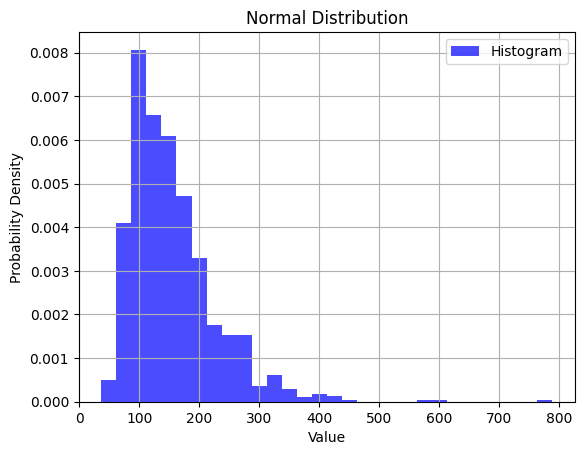

In [ ]:
### Creating Histogram
plt.hist(glucose['lab_result_num_val'], bins=30, density=True, alpha=0.7, color='blue', label='Histogram')
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
### Shapiro-Wilk Test for Normality
from scipy.stats import shapiro
stat, p = shapiro(glucose['lab_result_num_val'])
if p > 0.05:
    print("Glucose data follows a normal distribution.")
else:
    print("Glucose data does not follow a normal distribution.")

Glucose data does not follow a normal distribution.


### Automated Exploratory Data Analysis (EDA) with Python

In [ ]:
!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 44.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=d30bf7f202e1f6002ddaa7db52ff05f01732452554f462f75bfca391edafae2d
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
data = pd.read_csv('patient.csv')

In [ ]:
# Generate the EDA report
report = ProfileReport(data)
report.to_file('eda_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]